<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Naive-Bayes-Classifier-in-Scikit-learn" data-toc-modified-id="Naive-Bayes-Classifier-in-Scikit-learn-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Naive Bayes Classifier in Scikit-learn</a></span></li><li><span><a href="#Naive-Bayes-with-Multiple-Labels" data-toc-modified-id="Naive-Bayes-with-Multiple-Labels-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Naive Bayes with Multiple Labels</a></span></li><li><span><a href="#Decision-Tree-Classifier-Building-in-Scikit-Learn" data-toc-modified-id="Decision-Tree-Classifier-Building-in-Scikit-Learn-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Decision Tree Classifier Building in Scikit-Learn</a></span><ul class="toc-item"><li><span><a href="#Visualizing-Decision-Trees" data-toc-modified-id="Visualizing-Decision-Trees-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Visualizing Decision Trees</a></span></li></ul></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Random Forest</a></span><ul class="toc-item"><li><span><a href="#Building-a-Classifier-using-Scikit-Learn" data-toc-modified-id="Building-a-Classifier-using-Scikit-Learn-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Building a Classifier using Scikit-Learn</a></span></li><li><span><a href="#Finding-Important-Features-in-Scikit-learn" data-toc-modified-id="Finding-Important-Features-in-Scikit-learn-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Finding Important Features in Scikit-learn</a></span></li><li><span><a href="#Generating-the-model-on-selected-features" data-toc-modified-id="Generating-the-model-on-selected-features-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Generating the model on selected features</a></span></li></ul></li><li><span><a href="#SVM" data-toc-modified-id="SVM-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>SVM</a></span><ul class="toc-item"><li><span><a href="#Classifier-Building-in-Scikit-Learn" data-toc-modified-id="Classifier-Building-in-Scikit-Learn-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Classifier Building in Scikit-Learn</a></span></li></ul></li><li><span><a href="#Exercise:-Multiple-Algorithm-on-Dataset" data-toc-modified-id="Exercise:-Multiple-Algorithm-on-Dataset-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Exercise: Multiple Algorithm on Dataset</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Decision-Tree-Algorithm" data-toc-modified-id="Decision-Tree-Algorithm-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Decision Tree Algorithm</a></span></li><li><span><a href="#Random-Forest-Algorithm" data-toc-modified-id="Random-Forest-Algorithm-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Random Forest Algorithm</a></span></li><li><span><a href="#Support-Vector-Machine-(SVM)-Algorithm" data-toc-modified-id="Support-Vector-Machine-(SVM)-Algorithm-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Support Vector Machine (SVM) Algorithm</a></span></li><li><span><a href="#Naive-Bayes-Algorithm" data-toc-modified-id="Naive-Bayes-Algorithm-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Naive Bayes Algorithm</a></span></li><li><span><a href="#K-Nearest-Neighbor-(KNN)-Algorthm" data-toc-modified-id="K-Nearest-Neighbor-(KNN)-Algorthm-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>K-Nearest Neighbor (KNN) Algorthm</a></span></li></ul></li></ul></div>

# Naive Bayes Classifier in Scikit-learn

**Defining Dataset**

Dalam contoh ini, kita menggunakan kumpulan data dummy dengan tiga kolom: Weather, Temperature, dan Play. 
    
    - Dua pertama features (weather, temperature)
    - lainnya label

In [32]:
# Assigning features and label variables
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny', 'Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

**Encoding Features**

Mengubah string menjadi angka, misalnya 'Overcast', 'Rainy','Sunny' sebagai 0,1,2 dikenal sebagai label encoding. Scikit-Learn menyediakan pustaka LabelEncoder u/ mengkode label dengan nilai

In [2]:
# Import LabelEncoder
from sklearn import preprocessing

# creating labelencoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers
weather_encoded = le.fit_transform(weather)

print(weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [3]:
# Converting string labels into numbers
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)

print("Temp:",temp_encoded)
print("Play:",label)

Temp: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [4]:
#Combinig weather and temp into single listof tuples

features=list(zip(weather_encoded,temp_encoded))

features

[(2, 1),
 (2, 1),
 (0, 1),
 (1, 2),
 (1, 0),
 (1, 0),
 (0, 0),
 (2, 2),
 (2, 0),
 (1, 2),
 (2, 2),
 (0, 2),
 (0, 1),
 (1, 2)]

In [5]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
print("Predicted Value:", predicted)

Predicted Value: [1]


# Naive Bayes with Multiple Labels

Pada bagian pembuatan model, kita dapat menggunakan dataset wine. Kumpulan data ini adalah hasil dari analisis kimiawi anggur yang ditanam di wilayah yang sama di italia tetapi berasal dari tiga kultivar berbeda.

Set data terdiri dari 13 fitur (alcohol, malic_acid, ash, alcalinity_of_ash, magnesium, total_phenols, flavanoids, nonflavanoid_phenols, proanthocyanins, color_intensity, hue, od280/od315_of_diluted_wines, proline) dan type of wine cultivar. Data ini memiliki tiga jenis anggur Class_0, Class_1, Class_3. Disini, kita dapat membuat model untuk mengklasifikasi jenis anggur

**Loading Data**

Dataset tersedia di pustaka scikit-learn

In [6]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

In [7]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [8]:
# print the names of the 13 features
print("Features: ", wine.feature_names)

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [9]:
# print the label type of wine(class_0, class_1, class_2)
print("Labels: ", wine.target_names)

Labels:  ['class_0' 'class_1' 'class_2']


In [10]:
# print data(feature)shape
wine.data.shape

(178, 13)

In [11]:
# print the wine data features (top 5 records)
print(wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [12]:
# print the wine labels (0:Class_0, 1:class_2, 2:class_2)
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [13]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3,random_state=109) # 70% training and 30% test

In [14]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [15]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9074074074074074


# Decision Tree Classifier Building in Scikit-Learn

In [16]:
# Load libraries
import pandas as pd

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

from sklearn.model_selection import train_test_split # Import train_test_split function

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [17]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# load dataset
pima = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/diabetes.csv", header=None, names=col_names)

In [18]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


**Feature Selection**

Disni, kita perlu membagi kolom menjadi dua jenis variabel dependen(atau variabel target) dan variabel independen (atauu variabel fitur)

In [19]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pregnant  769 non-null    object
 1   glucose   769 non-null    object
 2   bp        769 non-null    object
 3   skin      769 non-null    object
 4   insulin   769 non-null    object
 5   bmi       769 non-null    object
 6   pedigree  769 non-null    object
 7   age       769 non-null    object
 8   label     769 non-null    object
dtypes: object(9)
memory usage: 54.2+ KB


In [20]:
numer = ['pregnant', 'insulin', 'bmi', 'age', 'glucose','bp','pedigree','label']

for col in numer: # coerce for missing values
    pima[col] = pd.to_numeric(pima[col], errors='coerce')

In [21]:
pima.dropna(inplace=True)

In [22]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 1 to 768
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    float64
 1   glucose   768 non-null    float64
 2   bp        768 non-null    float64
 3   skin      768 non-null    object 
 4   insulin   768 non-null    float64
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    float64
 8   label     768 non-null    float64
dtypes: float64(8), object(1)
memory usage: 60.0+ KB


In [23]:
# Split dataset in features and target variable

feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose','bp','pedigree']

X = pima[feature_cols] # Features
y = pima.label         # Target variable

In [24]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1 )

In [25]:
X_test

,pregnant,insulin,bmi,age,glucose,bp,pedigree
286,7.0,135.0,26.0,51.0,136.0,74.0,0.647
102,1.0,0.0,26.1,22.0,151.0,60.0,0.179
582,6.0,0.0,25.0,27.0,109.0,60.0,0.206
353,3.0,0.0,34.4,46.0,61.0,82.0,0.243
727,1.0,180.0,36.1,25.0,116.0,78.0,0.496
...,...,...,...,...,...,...,...
242,4.0,88.0,33.1,22.0,91.0,70.0,0.446
600,1.0,120.0,23.1,26.0,109.0,38.0,0.407
651,1.0,100.0,25.2,23.0,91.0,54.0,0.234
12,10.0,0.0,38.0,34.0,168.0,74.0,0.537


In [26]:
# Create Decision Tree Classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifier 
clf = clf.fit(X_train, y_train)

# Predict the respones for test dataset
y_pred = clf.predict(X_test)

In [27]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6536796536796536


## Visualizing Decision Trees

Kita menggunakan fungsi export_graphviz Scikit-learn u/ menampilakn tree dalam notebook jupyter. Untuk plotting tree, kita juga perlu menginstal graphviz dan pydotplus.
- graphviz mengubah decision tree classifier menjadi dot file
- pydotplus mengkonversi file dot ini ke png dan bentuk yg ditampilkan di Jupyter

In [28]:
!pip install graphviz

In [29]:
!pip install pydotplus

In [30]:
import sklearn.tree as tree
import pydotplus
from six import StringIO 
from IPython.display import Image
dot_data = StringIO()
tree.export_graphviz(clf, 
 out_file=dot_data, 
 class_names=['0','1'], # the target names.
 feature_names=feature_cols, # the feature names.
 filled=True, # Whether to fill in the boxes with colours.
 rounded=True, # Whether to round the corners of the boxes.
 special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

InvocationException: GraphViz's executables not found

**Optimizing Decision Tree Performance**

- criterion : optional (default=”gini”) atau Pilih attribute selection measure : Parameter ini memungkinkan kita untuk different-different attribute selection measure. Supported criteria are “gini” untuk indeks Gini “entropy” for the information gain.

- splitter : string, optional (default=”best”) or Split Strategy: Parameter ini memungkinkan kita untuk memilih split strategy. Supported strategies are “best” to choose the best split nd “random” to choose the best random split.

- max_depth : int or None, optional (default=None) or Maximum Depth of a Tree: The maximum depth of the tree. Jika Tidak Ada, maka node diperluas hingga semua daun berisi kurang dari sampel min_samples_split.  Nilai kedalaman maksimum yang lebih tinggi menyebabkan overfitting, dan nilai yang lebih rendah menyebabkan underfitting (Sumber). 

Dalam Scikit-learn, pengoptimalan decision tree classifier dilakukan hanya dengan pre-runing. Maximum depth pohon dapat digunakan sebagai variabel kontrol untuk pre-runing. Dalam contoh berikut, kita dapat memplot decision tree pada data yang sama dengan max_depth=3. dan ukuran pemilihan atribut lainnya seperti entropy.

In [31]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


# Random Forest

## Building a Classifier using Scikit-Learn

Kita akan membuat model pada kumpulan data iris flower. Terdiri dari sepal length, sepal width, petal length, petal width, dan jenis bunga. Ada tiga spesies atau kelas setosa, versicoloe, dan virginia. Kita akan membangun untuk mengklasifikasikan jenis bunga.

Mulai dengan mengimpor pustaka kumpulan data dari scikit-learn, dan muat kumpulan data dengann load_iris()

In [33]:
# Import scikit-learn dataset library
from sklearn import datasets

# Load dataset
iris = datasets.load_iris()

Kita dapat mencetak target dan feature, untuk memastikan kita memiliki datset yang tepat

In [35]:
# print the label species(setosa, versicolor, virginica)
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [36]:
# print the names of the four features
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Menjelajahi data

In [38]:
# print the iris data (top 5 records)
print(iris.data[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [39]:
# print the iris labels (0:setosa, 1:versicolor, 2:virginica)
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Disini, kita dapat membuat DataFrame dari dataset iris dengan cara berikut:

In [40]:
# Creating a DataFrame of given iris dataset
import pandas as pd 

data = pd.DataFrame({
    'sepal length': iris.data[:,0],
    'sepal width' : iris.data[:,1],
    'petal length': iris.data[:,2],
    'petal width' : iris.data[:,3],
    'species': iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Pertama, kita pisahkan kolom menjadi variabel dependen dan independen(atau features dan labels). Kemudian kita membagi variabel tersebut menjadi training dan test set.

In [41]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X = data[['sepal length','sepal width','petal length','petal width']] # features
y = data['species'] # labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

Setelah dipisahkan, kita akan melatih model pada set training dan melakukan prediksi pada set test.

In [42]:
# Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets y_pred = clf.predict(X_test)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

Periksa accuracy menggunakan nilai actual dan predicted

In [43]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


Kita juga dapat membuat prediksi untuk satu item, misalnya:
- sepal length = 3
- sepal width  = 5
- petal length = 4
- petal width  = 2

In [44]:
clf.predict([[3, 5, 4, 2]])

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

## Finding Important Features in Scikit-learn

Disni, kita dapat menemukan fitur-fitur penting atau memilih fitur dalam dataset IRIS. Dalam scikit-learn, kita dapat melakukannya dalam langkah-langkah berikut:
- First, Anda perlu membuat random forests model
- Second, gunakan feature importance variable untuk melihat skor feature importance.
- Third,  visualisasikan skor ini menggunakan perpustakaan seaborn.

In [45]:
from sklearn.ensemble import RandomForestClassifier

# Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets y_pred = clf.predict(X_test)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [47]:
import pandas as pd 

feature_imp = pd.Series(clf.feature_importances_, index=iris.feature_names).sort_values(ascending=False)

feature_imp

petal length (cm)    0.473184
petal width (cm)     0.419527
sepal length (cm)    0.085796
sepal width (cm)     0.021493
dtype: float64

Kita dapat memvisualisasikan feature importance

No handles with labels found to put in legend.


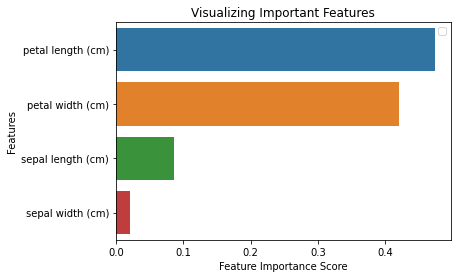

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.legend()
plt.show()

## Generating the model on selected features

Disni, kita dapat menghapus fitur "Sepal width" karena tingkat kepentingannya sangat rendah dan memilih fitur lainnya.

In [51]:
# Import train_test_split_function
from sklearn.model_selection import train_test_split

# Split dataset into features and labels
X = data[['petal length','petal width','sepal length']]
y = data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5)

Setelah dipisah, kita akan membuat model pada training set features yang dipilih, melakukan prediksi pada test set features yang dipilih dan membandingkan nilai aktual dan nilai prediksi

In [52]:
from sklearn.ensemble import RandomForestClassifier

# Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets y_pred = clf.predict(X_test)
clf.fit(X_train, y_train)

# prediction on test set
y_pred = clf.predict(X_test)

# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
metrics.accuracy_score(y_test, y_pred)

0.9523809523809523

Kita melihat bahwa setelah menghapus fitur yang paling tidak penting(sepal length), keakuratan meningkat. Jumlah fitur yang sdikit juga mengurangi training time

# SVM

## Classifier Building in Scikit-Learn

Dalam membuat model, kita dapat menggunakan cancer dataset. Dataset ini dihitung dari gambar digital dari fine needle aspirate (FNA) dari amssa payudara. Dataset terdiri dari 30 fitur dan target.

Data ini memiliki dua jenis kelas kanker : malignant (berbahaya) dan benign (tidak berbahaya). Disini, kita dapat membuat model untuk mengelompokkan jenis kanker.

**Loading Data**

In [1]:
# Import scikit-learn dataset library
from sklearn import datasets

# Load dataset
cancer = datasets.load_breast_cancer()

**Exploring Data**

In [2]:
# print the names of the 13 features
print('features: ', cancer.feature_names)

features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [3]:
# print the label type of cancer ('malignant','benign')
print('Labels: ', cancer.target_names)

Labels:  ['malignant' 'benign']


In [4]:
# print data (feature) shape
cancer.data.shape

(569, 30)

In [5]:
# print the cancer data features (top 5 records)
print(cancer.data[0:5])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

Mari kita lihat set target

In [6]:
# print the cancer labels (0: malignant, 1: beingn)
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

**Splitting Data**

Untu memaahami performa model, membagi set data menjadi training set dan test set adalah strategi yang baik. Pisahkan kumpulan data dengan fungsi train_test_split(). Kita harus meneruskan 3 parameter features, target, and test_size. Selain itu, kita dapat menggunakan random_state untuk memilih record secara acak.

In [7]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=109) # 70% training and 30 % test

In [11]:
X_train.shape

(398, 30)

In [12]:
X_test.shape

(171, 30)

**Generating Model**

Mari kita membangun SVM model. Pertama, impor modul SVM dan buat objek SVM dengan meneruskan argumen kernel sebagai kernel liner dalam fungsi SVC().

Kemudian, training model kita di train set menggunakan fit() dan lakukan prediksi pada set test menggunakan predict()

In [8]:
# Import svm model
from sklearn import svm

# Create a svm Classifier
clf = svm.SVC(kernel='linear') # linear kernel

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [9]:
y_pred

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

**Evaluating the Model**

Mari kita perkirakan seberapa akurat pengklasifikasi atau model dapat memprediksi kanker. Akurasi dapat dihitung dengan membandingkan nilai set test akutal dan nilai prediksi.

In [13]:
# import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9649122807017544


Kita mendapat tingkat klasifikasi 96,49% dianggap sebagai akurasi yg sgt baik. Untuk evaluasi lebih lanjut, kita dapat memeriksa precision dan recall model

In [16]:
# Model Precision: What percentage of positive tuples are labeled as such?
print("Precision : ", metrics.precision_score(y_test, y_pred))

# Model Recal;: What percentage of positive tuples are labeled as such?
print("Recall    : ", metrics.recall_score(y_test, y_pred))

Precision :  0.9811320754716981
Recall    :  0.9629629629629629


Kita mendapatkan precision 98% dan recall 96% yang dianggap sebagai nilai yang sangat baik.

# Exercise: Multiple Algorithm on Dataset

In [17]:
import pandas as pd 
import numpy as np

In [18]:
train = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Final_Dataset/train.csv')

In [19]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [20]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [21]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
train.fillna(train.mean(), inplace=True)
train.isnull().sum()

C:\Users\Asus\AppData\Local\Temp/ipykernel_8952/705823306.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.fillna(train.mean(), inplace=True)


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [25]:
train.Gender.fillna(train.Gender.mode()[0], inplace=True)
train.Married.fillna(train.Married.mode()[0], inplace=True)
train.Dependents.fillna(train.Dependents.mode()[0], inplace=True)
train.Self_Employed.fillna(train.Self_Employed.mode()[0], inplace=True)

train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [26]:
train.Loan_Amount_Term = np.log(train.Loan_Amount_Term)

In [27]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

C:\Users\Asus\AppData\Local\Temp/ipykernel_8952/3932897971.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = train.drop('Loan_Status',1)


In [28]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)

In [29]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,5.886104,1.0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,5.886104,1.0,0,1,0,0,0,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,5.886104,1.0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,5.886104,1.0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,5.886104,1.0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1


In [30]:
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2)

## Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [33]:
pred_cv = model.predict(x_cv)

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print(accuracy_score(y_cv, pred_cv))
matrix = confusion_matrix(y_cv, pred_cv)
matrix

0.7886178861788617


array([[20, 23],
       [ 3, 77]], dtype=int64)

## Decision Tree Algorithm

In [38]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [39]:
pred_cv1=dt.predict(x_cv)

In [43]:
print(accuracy_score(y_cv, pred_cv1))
matrix1 = confusion_matrix(y_cv, pred_cv1)
matrix1

0.7642276422764228


array([[24, 19],
       [10, 70]], dtype=int64)

## Random Forest Algorithm

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [42]:
pred_cv2 = rf.predict(x_cv)

In [46]:
print(accuracy_score(y_cv, pred_cv2))
matrix2 = confusion_matrix(y_cv, pred_cv2)
matrix2

0.8211382113821138


array([[23, 20],
       [ 2, 78]], dtype=int64)

## Support Vector Machine (SVM) Algorithm

In [47]:
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(x_train, y_train)

SVC()

In [48]:
pred_cv3 = svm_model.predict(x_cv)

In [49]:
print(accuracy_score(y_cv, pred_cv3))
matrix3 = confusion_matrix(y_cv, pred_cv3)
matrix3

0.6504065040650406


array([[ 0, 43],
       [ 0, 80]], dtype=int64)

## Naive Bayes Algorithm

In [51]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

pred_cv4 = nb.predict(x_cv)

print(accuracy_score(y_cv, pred_cv4))
matrix4 = confusion_matrix(y_cv, pred_cv4)
matrix4

0.8455284552845529


array([[25, 18],
       [ 1, 79]], dtype=int64)

## K-Nearest Neighbor (KNN) Algorthm

In [53]:
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier()
kNN.fit(x_train, y_train)

pred_cv5 = kNN.predict(x_cv)

print(accuracy_score(y_cv, pred_cv5))
matrix5 = confusion_matrix(y_cv, pred_cv5)
matrix5

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.6341463414634146


array([[ 6, 37],
       [ 8, 72]], dtype=int64)

In [55]:
print("Logistic Regression :", accuracy_score(y_cv, pred_cv))
print("Decision Tree       :", accuracy_score(y_cv, pred_cv1))
print("Random Forest       :", accuracy_score(y_cv, pred_cv2))
print("SVM                 :", accuracy_score(y_cv, pred_cv3))
print("Naive Bayes         :", accuracy_score(y_cv, pred_cv4))
print("KNN                 :", accuracy_score(y_cv, pred_cv5))

Logistic Regression : 0.7886178861788617
Decision Tree       : 0.7642276422764228
Random Forest       : 0.8211382113821138
SVM                 : 0.6504065040650406
Naive Bayes         : 0.8455284552845529
KNN                 : 0.6341463414634146


In [57]:
# Write test results in csv file

predictions = pd.DataFrame(pred_cv2, columns=['Predictions']).to_csv('H8-002.csv')